In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [20]:
data = pd.read_csv('demand_prediction.csv')
data.head()

,year,week,units_sold,population,shipping_costs,transportation_costs
0,2010,1,13344,5077000,74.69,46.55
1,2010,2,13651,5077000,15.28,35.19
2,2010,3,12798,5077000,46.33,14.39
3,2010,4,13341,5077000,58.22,23.75
4,2010,5,10581,5077400,86.31,58.90


### Uni-Variate Linear Regression Model

Train Set	: (400, 1) (400, 1)
Test Set 	: (100, 1) (100, 1)


Intercept of Regression 	: b =  [-1964125.92488249]
Coefficients of Regression 	: a =  [[0.38904221]]



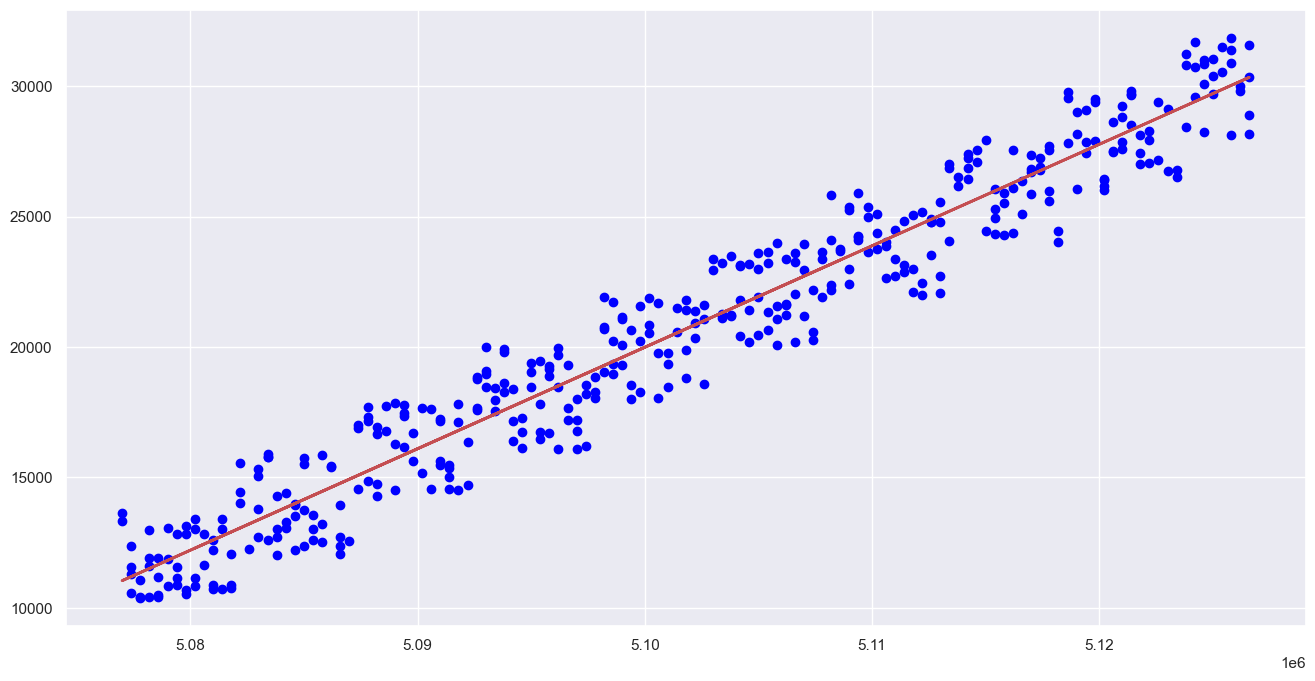

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9448889729765003
Mean Squared Error (MSE) 	: 1811036.7668064581
Root Mean Squared Error (RMSE) 	: 1345.7476608957782

Prediction Accuracy 		Test Dataset
Explained Variance (R^2) 	: 0.9457620634893213
Mean Squared Error (MSE) 	: 1856470.8297809912
Root Mean Squared Error (RMSE) 	: 1362.5236987960948


In [21]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dataset
demand = pd.DataFrame(data['units_sold'])           # Response 
pop = pd.DataFrame(data['population'])              # Predictor

# Split the Dataset into Train and Test
pop_train, pop_test, demand_train, demand_test = train_test_split(pop, demand, test_size = 0.20)
print("Train Set\t:", pop_train.shape, demand_train.shape)
print("Test Set \t:", pop_test.shape, demand_test.shape)
print("\n")

# Linear Regression using Train Data
linreg = LinearRegression()                   # create the linear regression object
linreg.fit(pop_train, demand_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict SalePrice values corresponding to GrLivArea
demand_train_pred = linreg.predict(pop_train)
demand_test_pred = linreg.predict(pop_test)

# Plot the Predictions vs the True values
f = plt.figure(figsize=(16, 8))
plt.scatter(pop_train, demand_train, color = "blue")
plt.plot(pop_train, demand_train_pred, 'r-', linewidth = 2)
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(pop_train, demand_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(demand_train, demand_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(demand_train, demand_train_pred)))

print()

# Check the Prediction Accuracy (on Test Data)
print("Prediction Accuracy \t\tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(pop_test, demand_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(demand_test, demand_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(demand_test, demand_test_pred)))